## クラスタリング結果の比較
* 本実習は [K-meansクラスタリング](http://nbviewer.jupyter.org/github/maskot1977/ipython_notebook/blob/master/K-means%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E3%83%AA%E3%83%B3%E3%82%AF%E3%82%99.ipynb) と[階層的クラスタリング](http://nbviewer.jupyter.org/github/maskot1977/ipython_notebook/blob/master/%E9%9A%8E%E5%B1%A4%E7%9A%84%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E3%83%AA%E3%83%B3%E3%82%AF%E3%82%99.ipynb) の内容を全て理解していることを前提としています。
* クラスタリングは「教師なし学習」の一種で、答え（既知ラベル）を使わずにデータ（ベクトル）をいくつかのクラスタに分類します。もしも既知ラベルが分かっている場合は、クラスタリング結果がその既知ラベルとどの程度一致しているかを調べることができます。

### まずはサンプルデータの取得から

In [1]:
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
import urllib
# ウェブ上のリソースを指定する
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/iris.txt'
# 指定したURLからリソースをダウンロードし、名前をつける。
urllib.urlretrieve(url, 'iris.txt')

('iris.txt', <httplib.HTTPMessage instance at 0x104106cf8>)

In [2]:
import pandas as pd # データフレームワーク処理のライブラリをインポート
df = pd.read_csv("iris.txt", sep='\t', na_values=".") # データの読み込み

### 階層的クラスタリングの復習です。

In [3]:
# metric は色々あるので、ケースバイケースでどれかひとつ好きなものを選ぶ。
# method も色々あるので、ケースバイケースでどれかひとつ好きなものを選ぶ。
from scipy.cluster.hierarchy import linkage, dendrogram
result1 = linkage(df.iloc[:, 1:5], 
                  metric = 'braycurtis', 
                  #metric = 'canberra', 
                  #metric = 'chebyshev', 
                  #metric = 'cityblock', 
                  #metric = 'correlation', 
                  #metric = 'cosine', 
                  #metric = 'euclidean', 
                  #metric = 'hamming', 
                  #metric = 'jaccard', 
                  #method= 'single')
                  method = 'average')
                  #method= 'complete')
                  #method='weighted')

In [4]:
# 指定したクラスタ数でクラスタを得る関数を作る。
def get_cluster_by_number(result, number):
    output_clusters = []
    x_result, y_result = result.shape
    n_clusters = x_result + 1
    cluster_id = x_result + 1
    father_of = {}
    df1 = pd.DataFrame(result)
    x1 = []
    y1 = []
    x2 = []
    y2 = []
    for i in df1.index:
        n1 = int(df1.ix[i][0])
        n2 = int(df1.ix[i][1])
        val = df1.ix[i][2]
        n_clusters -= 1
        if n_clusters >= number:
            father_of[n1] = cluster_id
            father_of[n2] = cluster_id
            
        cluster_id += 1
    
    cluster_dict = {}
    for n in range(x_result + 1):
        if not father_of.has_key(n):
            output_clusters.append([n])
            continue
        
        n2 = n
        m = False
        while father_of.has_key(n2):
            m = father_of[n2]
            #print [n2, m]
            n2 = m
        
        if not cluster_dict.has_key(m):
            cluster_dict.update({m:[]})
        cluster_dict[m].append(n)
    
    output_clusters += cluster_dict.values()
            
    output_cluster_id = 0
    output_cluster_ids = [0] * (x_result + 1)
    for cluster in sorted(output_clusters):
        for i in cluster:
            output_cluster_ids[i] = output_cluster_id
        output_cluster_id += 1
            
    return output_cluster_ids

### クラスタリング結果のマッピング

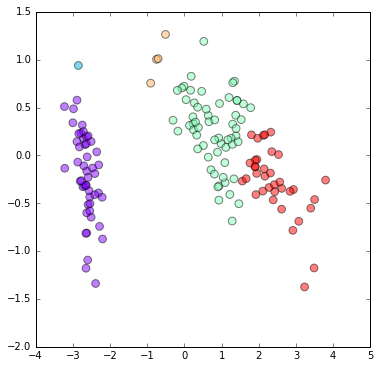

In [5]:
# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt
%matplotlib inline
# 主成分分析のプロットに、クラスタリング結果をマッピング
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df[df.columns[1:5]])
feature = pca.transform(df[df.columns[1:5]])
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], c=get_cluster_by_number(result1, 5), s=60, alpha=0.5,
            cmap=plt.cm.rainbow)
plt.show()

### ラベルが既知の場合に、既知ラベルをマッピングする

In [6]:
# 既知ラベルの名前を、0, 1, 2 などの数字に置き換えます。
target_names = []
target = []
for word in df[df.columns[5]]:
    if word not in target_names:
        target_names.append(word)
    target.append(target_names.index(word))

In [7]:
# 作った target_names と target の中身の確認
print target_names
print target

['setosa', 'versicolor', 'virginica']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


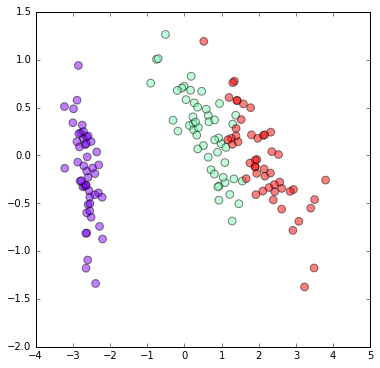

In [8]:
# 主成分分析のプロットに、既知ラベルをマッピング
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df[df.columns[1:5]])
feature = pca.transform(df[df.columns[1:5]])
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], c=target, s=60, alpha=0.5,
            cmap=plt.cm.rainbow)
plt.show()

### クラスタリング結果と既知ラベルを比較する
* さて、ここからが本番です。
* 上記のマッピング結果を見比べた限り、クラスタリング結果と既知ラベルはよく一致しているように見えますが、微妙に違うようにも見えます。
* この違いを、[総合実験（４日目）](http://nbviewer.jupyter.org/github/maskot1977/ipython_notebook/blob/master/%E7%B7%8F%E5%90%88%E5%AE%9F%E9%A8%93%EF%BC%94%E6%97%A5%E7%9B%AE.ipynb)で用いた「混同行列 (confusion matrix)」を用いて図示してみましょう。

In [9]:
# クラスタリング結果と既知ラベルの混合行列。必ずしも正方行列にはならない。
num_clusters = 5
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(get_cluster_by_number(result1, num_clusters), target))

,0,1,2,3,4
0,49,0,0,0,0
1,1,0,0,0,0
2,0,45,15,0,0
3,0,4,0,0,0
4,0,1,35,0,0


クラスタリング結果と既知ラベルの混合行列をヒートマップとして図示します。上記の混合行列とは上下が逆になっていることに注意してください。

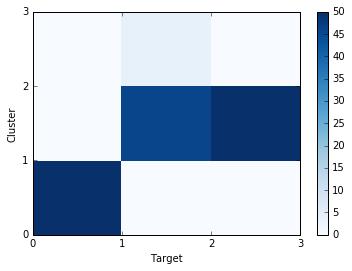

In [10]:
# クラスタリング結果と既知ラベルの混合行列をヒートマップとして図示。
num_clusters = 3
import matplotlib.ticker as ticker
plt.pcolor(confusion_matrix(get_cluster_by_number(result1, num_clusters), target), cmap=plt.cm.Blues)
plt.colorbar()
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.gca().get_yaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.xlim([0, len(target_names)])
plt.ylim([0, num_clusters])
plt.xlabel("Target")
plt.ylabel("Cluster")
plt.show()

上図のように、３つのClusterではTargetを上手に分離できていないことが分かります。クラスタ数を増やすと次のようになります。

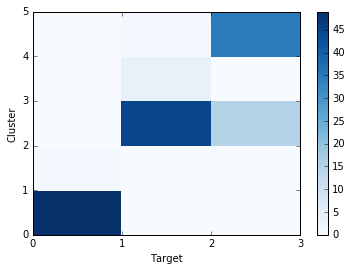

In [11]:
num_clusters = 5
import matplotlib.ticker as ticker
plt.pcolor(confusion_matrix(get_cluster_by_number(result1, num_clusters), target), cmap=plt.cm.Blues)
plt.colorbar()
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.gca().get_yaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.xlim([0, len(target_names)])
plt.ylim([0, num_clusters])
plt.xlabel("Target")
plt.ylabel("Cluster")
plt.show()

クラスタ数を増やすと、Targetを先程よりは上手に分離できることが分かりました。
### 最適なクラスタ数を求める
それでは、クラスタ数をどの程度にすると既知ラベルと最も一致するでしょうか。ここで、クラスタと既知ラベルの比較のための Accuracy, Precision, Recall を次のように定義します。

In [12]:
def calc_accuracy(clusters, target):
    tot_num = 0
    same = 0
    for c1, t1 in zip(clusters, target):
        for c2, t2 in zip(clusters, target):
            tot_num += 1
            if c1 == c2 and t1 == t2:
                same += 1
            elif c1 != c2 and t1 != t2:
                same += 1
    return float(same) / float(tot_num)

In [13]:
def calc_precision(clusters, target):
    tot_num = 0
    same = 0
    for c1, t1 in zip(clusters, target):
        for c2, t2 in zip(clusters, target):
            if c1 == c2:
                tot_num += 1
                if t1 == t2:
                    same += 1
    return float(same) / float(tot_num)

In [14]:
def calc_recall(clusters, target):
    tot_num = 0
    same = 0
    for c1, t1 in zip(clusters, target):
        for c2, t2 in zip(clusters, target):
            if t1 == t2:
                tot_num += 1
                if c1 == c2:
                    same += 1
    return float(same) / float(tot_num)

クラスタ数を、２から「既知ラベルの数 x 4」の範囲で動かして、Accuracy, Precision, Recallがどのように変化するか見てみましょう。

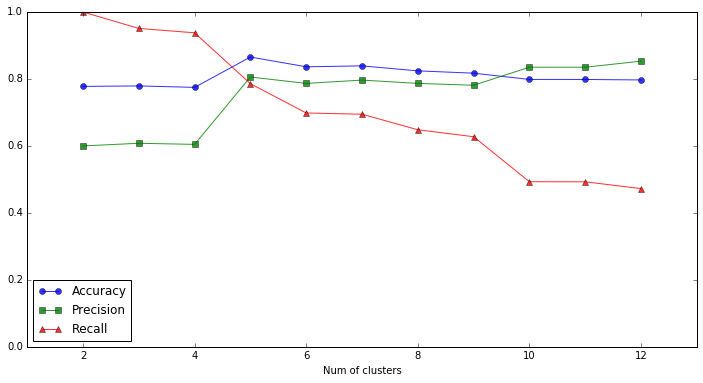

In [15]:
num_clusters = []
accuracy = []
precision = []
recall = []
for i in range(2, len(target_names) * 4 + 1):
    clusters = get_cluster_by_number(result1, i)
    num_clusters.append(i)
    accuracy.append(calc_accuracy(clusters, target))
    precision.append(calc_precision(clusters, target))
    recall.append(calc_recall(clusters, target))

plt.figure(figsize=(12, 6))
plt.plot(num_clusters, accuracy,  '-o', label="Accuracy", alpha=0.8)
plt.plot(num_clusters, precision, '-s', label="Precision", alpha=0.8)
plt.plot(num_clusters, recall, '-^', label="Recall", alpha=0.8)
plt.xlabel("Num of clusters")
plt.xlim([1,len(accuracy) + 2])
plt.ylim([0,1])
plt.legend(loc='best')
plt.show()

Accuracyはクラスタ数が５のときに最大値を得ました。Precisionはクラスタ数に対してほぼ単調減少、Recallはほぼ単調増加になります。クラスタ数が５のときが、既知ラベルと最も一致している「ちょうどいいクラスター」であると解釈していいかも知れません。

----------
## 課題
以上の実習では、階層的クラスタリングの結果に対して、既知ラベルとどのように一致するのか調べました。同様にして、同じデータを使って、K-meansクラスタリングの結果に対して既知ラベルとどのように一致するのか調べてください。

お疲れ様でした。他の教材は随時下記に追加予定です。→ [IPython Notebook](https://sites.google.com/site/masaakikotera/8-python/8-2-ipython-notebook)